In [1]:
import pandas as pd
import numpy as np

from datetime import datetime




%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* focus is often a visual representation of the data 


In [3]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.sort_values('date',ascending=False).head()

date       US   Brazil    India   Russia   Spain  United Kingdom  \
236  2020-09-14  6553399  4345610  4846427  1064438  593730          373555   
235  2020-09-13  6519573  4330455  4846427  1059024  566326          370930   
234  2020-09-12  6485123  4315687  4754356  1053663  566326          367592   
233  2020-09-11  6443652  4282164  4659984  1048257  566326          364088   
232  2020-09-10  6396100  4238446  4562414  1042836  554143          360544   

      Italy    Peru    Iran  ...  Timor-Leste  Grenada  Fiji  Saint Lucia  \
236  288761  729619  404648  ...           27       24    32           27   
235  287753  722832  402029  ...           27       24    32           27   
234  286297  716670  399940  ...           27       24    32           27   
233  284796  710067  397801  ...           27       24    32           27   
232  283180  702776  395488  ...           27       24    32           27   

     Laos  Dominica  Saint Kitts and Nevis  Holy See  MS Zaandam  \
236    23        24                     17        12           9   
235    23        24                     17        12           9   
234    23        24                     17        12           9   
233    23        24                     17        12           9   
232    22        24                     17        12           9   

     Western Sahara  
236              10  
235              10  
234              10  
233              10  
232              10  

[5 rows x 188 columns]

# Matplotlib Example

/home/harsh/anaconda3/envs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1152x648 with 0 Axes>

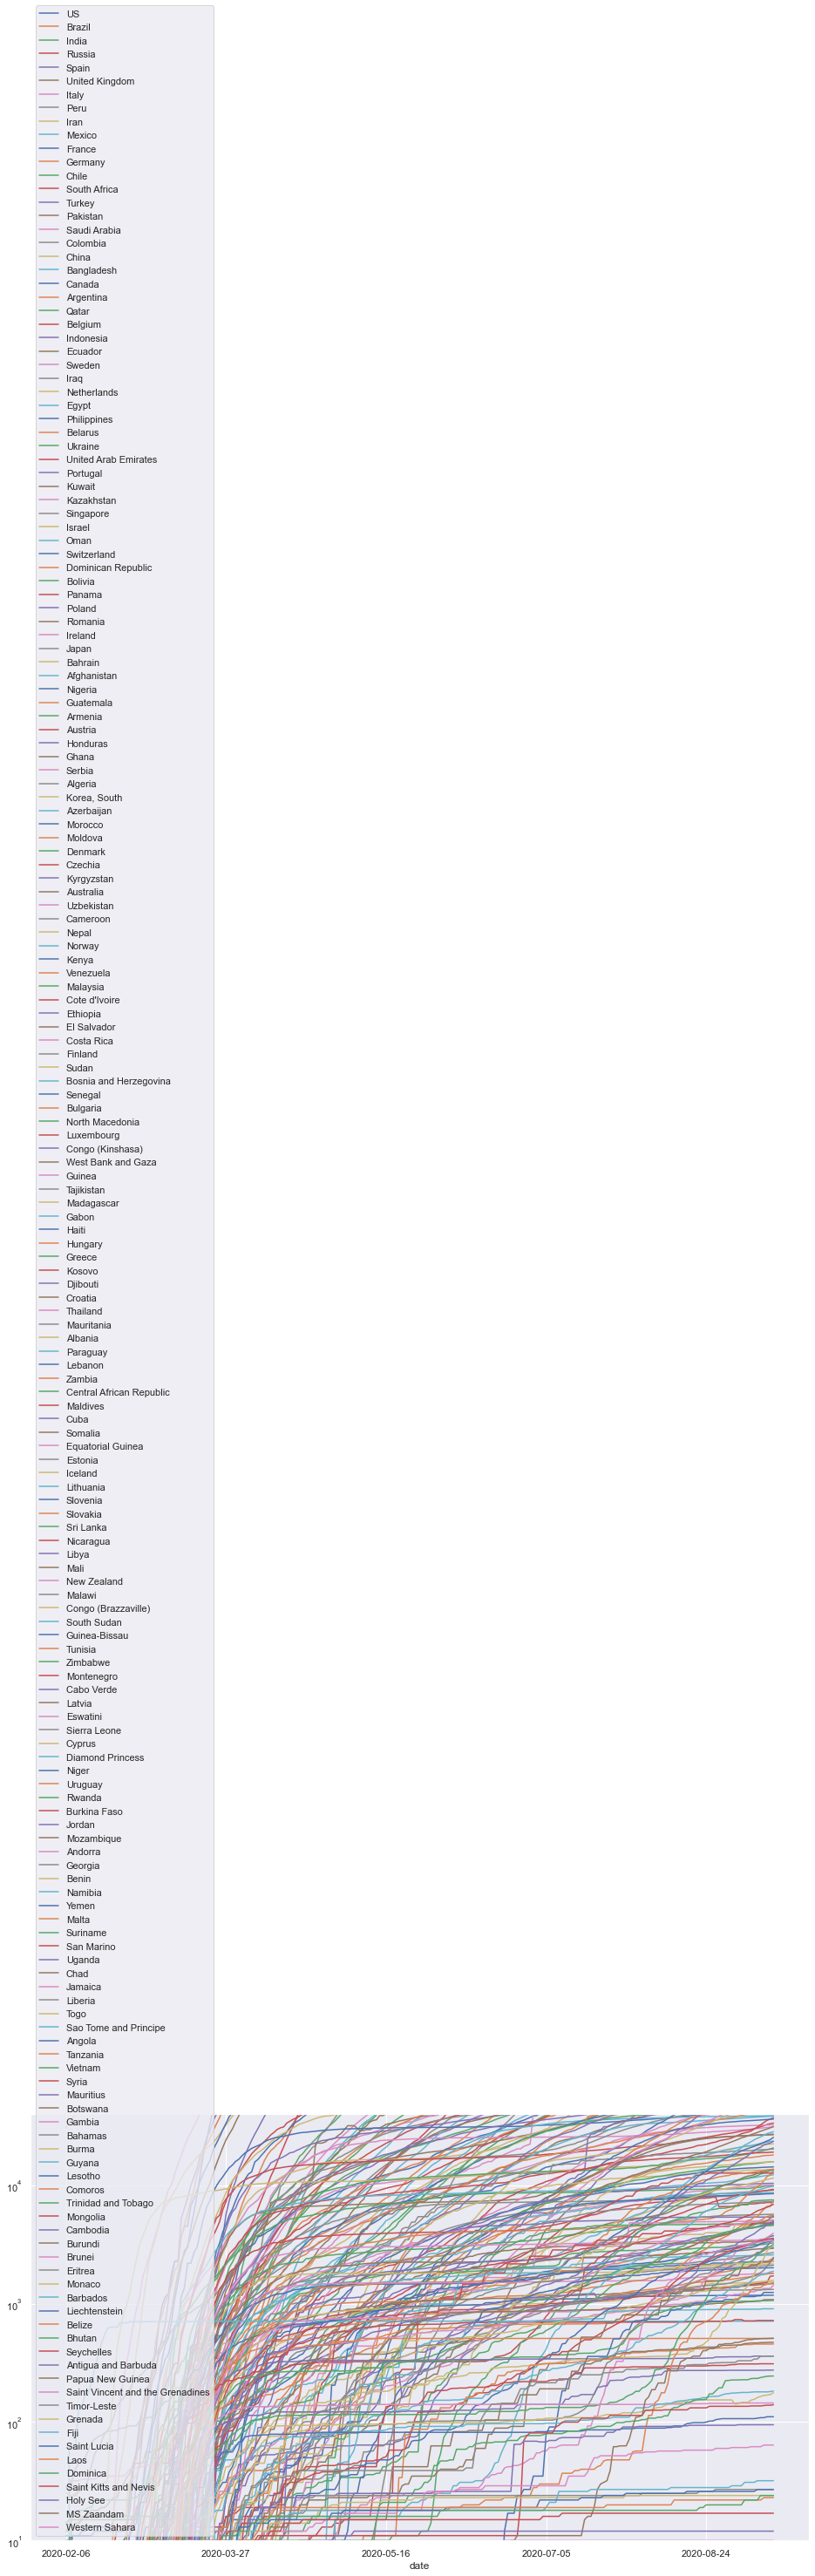

In [4]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 40000)
ax.set_yscale('log')

# Plot.ly

In [5]:
import plotly.graph_objects as go

In [6]:
import plotly
plotly.__version__

'4.9.0'

In [7]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [8]:
fig = go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])


fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()

In [9]:
options = [{'label': 'US', 'value': 'US'}, {'label': 'India', 'value': 'India'}]


In [10]:
country_list = ['US', 'India']

In [11]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        print()
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [12]:
print(type(df_plot.date))

<class 'pandas.core.series.Series'>


In [13]:
# take care to press stop button befor calling once again, since address will be blocked (server up)
# if you have problems to find (kill) the process, use the following cmd commands (Linux)
# sudo lsof -n -i :8050 | grep LISTEN 
# kill -9 pid 

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on




In [14]:
df_plot.date

df_plot['US']

0            1
1            1
2            2
3            2
4            5
5            5
6            5
7            5
8            5
9            7
10           8
11           8
12          11
13          11
14          11
15          11
16          11
17          11
18          11
19          11
20          12
21          12
22          13
23          13
24          13
25          13
26          13
27          13
28          13
29          13
30          15
31          15
32          15
33          15
34          15
35          15
36          16
37          16
38          24
39          30
40          52
41          72
42         103
43         172
44         215
45         337
46         450
47         515
48         713
49        1105
50        1530
51        2115
52        2814
53        2986
54        4354
55        5970
56        8386
57       12674
58       18736
59       24508
60       33152
61       43850
62       54112
63       66055
64       83611
65      102101
66      12